In [1]:
import corner
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('image', cmap='jet')
mpl.rcParams['font.size'] = 20
from matplotlib.colors import ListedColormap
import matplotlib.lines as mlines

In [2]:
fn='./VectorizedNumpyro_block_JEC_16x1000spls.npy'
data_nuts_benchmark = np.load(fn, allow_pickle=True).item()

In [3]:
# order "Omega_c","sigma8","w0","h", "Omega_b", "n_s",
#        "A", "eta",
#        "b1","b2","b3","b4","b5",
#        "m1","m2","m3","m4",
#        "dz1","dz2","dz3","dz4"

In [21]:
keys = ["Omega_c","sigma8","w0", "h", "Omega_b"]
theta_dim = len(keys)

In [35]:
#spls_SNPE_nsf_0 = np.load("./run_SNPE_nsf"+"/DESXY1_values_SNPE_0_100000_nsf_b.npy")
#values = [spls_SNPE_nsf_0[:,i]for i in range(theta_dim)]
#data_SNPE_nsf_0 = dict(zip(keys,values))#


#spls_SNPE_nsf_1 = np.load("./run_SNPE_snf"+"/DESXY1_values_SNPE_1_100000_nsf_b.npy")
#values = [spls_SNPE_nsf_1[:,i]for i in range(theta_dim)]
#data_SNPE_nsf_1 = dict(zip(keys,values))

In [22]:
spls_SNPE_mdn_0 = np.load("./run_SNPE_mdn/"+"DESXY1_values_SNPE_0_100000_mdn_default.npy")
values = [spls_SNPE_mdn_0[:,i]for i in range(theta_dim)]
data_SNPE_mdn_0 = dict(zip(keys,values))

spls_SNPE_mdn_1 = np.load("./run_SNPE_mdn/"+"DESXY1_values_SNPE_1_100000_mdn_default.npy")
values = [spls_SNPE_mdn_1[:,i]for i in range(theta_dim)]
data_SNPE_mdn_1 = dict(zip(keys,values))

spls_SNPE_mdn_2 = np.load("./run_SNPE_mdn/"+"DESXY1_values_SNPE_2_100000_mdn_default.npy")
values = [spls_SNPE_mdn_2[:,i]for i in range(theta_dim)]
data_SNPE_mdn_2 = dict(zip(keys,values))

spls_SNPE_mdn_3 = np.load("./run_SNPE_mdn/"+"DESXY1_values_SNPE_3_100000_mdn_default.npy")
values = [spls_SNPE_mdn_3[:,i]for i in range(theta_dim)]
data_SNPE_mdn_3 = dict(zip(keys,values))

spls_SNPE_mdn_4 = np.load("./run_SNPE_mdn/"+"DESXY1_values_SNPE_4_100000_mdn_default.npy")
values = [spls_SNPE_mdn_4[:,i]for i in range(theta_dim)]
data_SNPE_mdn_4 = dict(zip(keys,values))

In [29]:
spls_SNPE_mdn_cpx_0 = np.load("./run_SNPE_mdn_cpx/"+"DESXY1_values_SNPE_0_100000_mdn_default.npy")
values = [spls_SNPE_mdn_cpx_0[:,i]for i in range(theta_dim)]
data_SNPE_mdn_cpx_0 = dict(zip(keys,values))


spls_SNPE_mdn_cpx_1 = np.load("./run_SNPE_mdn_cpx/"+"DESXY1_values_SNPE_0_100000_mdn_default.npy")
values = [spls_SNPE_mdn_cpx_1[:,i]for i in range(theta_dim)]
data_SNPE_mdn_cpx_1 = dict(zip(keys,values))

spls_SNPE_mdn_cpx_2 = np.load("./run_SNPE_mdn_cpx/"+"DESXY1_values_SNPE_0_100000_mdn_default.npy")
values = [spls_SNPE_mdn_cpx_2[:,i]for i in range(theta_dim)]
data_SNPE_mdn_cpx_2 = dict(zip(keys,values))


spls_SNPE_mdn_cpx_3 = np.load("./run_SNPE_mdn_cpx/"+"DESXY1_values_SNPE_3_100000_mdn_default.npy")
values = [spls_SNPE_mdn_cpx_3[:,i]for i in range(theta_dim)]
data_SNPE_mdn_cpx_3 = dict(zip(keys,values))


spls_SNPE_mdn_cpx_4 = np.load("./run_SNPE_mdn_cpx/"+"DESXY1_values_SNPE_4_100000_mdn_default.npy")
values = [spls_SNPE_mdn_cpx_4[:,i]for i in range(theta_dim)]
data_SNPE_mdn_cpx_4 = dict(zip(keys,values))


In [24]:
fidu_params = {'Omega_c':0.2545, 'sigma8':0.801, 'h':0.682, 'Omega_b':0.0485, 'w0':-1.,'n_s':0.971,
     'A':0.5,'eta':0.,
     'm1':0.0,'m2':0.0,'m3':0.0,'m4':0.0,
     'dz1':0.0,'dz2':0.0,'dz3':0.0,'dz4':0.0,
     'b1':1.2,'b2':1.4,'b3':1.6,'b4':1.8,'b5':2.0
      }
true_theta = np.array([fidu_params[s] for s in keys])
truth = dict(zip(keys,true_theta))

In [25]:
import arviz.labels as azl


labeller = azl.MapLabeller(var_name_map={"Omega_c": r"$\Omega_c$", 
                                             "sigma8": r"$\sigma_8$",
                                             "h":r"$h$", "Omega_b": r"$\Omega_b$",
                                             "w0": r"$w_0$", "A":r"$A$",
                                            "m1":r"$m_1$", "m2":r"$m_2$", "m3":r"$m_3$", "m4":r"$m_4$",
                                           'dz1':r"dz_1", 'dz2':r"dz_2",'dz3':r"dz_3", 'dz4':r"dz_4",
                                            "b1":r"$b_1$", "b2":r"$b_2$","b3":r"$b_3$","b4":r"$b_4$","b5":r"$b_5$" })
dict_true = fidu_params

In [26]:
def compare(data1, data2, data3, 
            var_nm,  xylims=False,  reference_values=None,reference_color="cyan",
            label1="data1", label2="data2",label3="data3",
           fn='fig.png'):
    
    
    colors = ['blue','red','green']
    lss    = ['-','-','-']
    lws    = [2,2,2]
    
    cmap1 = "Blues"#ListedColormap(['blue'])
    cmap2 = "Reds"#ListedColormap(['red'])
    cmap3 = "Greens"#ListedColormap(['green'])
    
    axes1= az.plot_pair(
        data1,
        kind="kde",
        labeller=labeller,
        var_names=var_nm,
        marginal_kwargs={"plot_kwargs": {"lw": lws[0], "c": colors[0], "ls": lss[0]}},
        kde_kwargs={
            "hdi_probs": [0.3, 0.68, 0.9],  # Plot 68% and 90% HDI contours
            #"hdi_probs":[0.393, 0.865, 0.989],  # 1, 2 and 3 sigma contours
            "contour_kwargs":{"colors":None, "cmap":cmap1, "linewidths":lws[0],
                              "linestyles":lss[0]},
            "contourf_kwargs":{"alpha":0.1, "cmap":cmap1},
        },
        point_estimate_kwargs={"lw": 2, "c": "blue", "ls":"--"},
        marginals=True, textsize=35, point_estimate='median',
                             reference_values=reference_values,
             reference_values_kwargs={"c":reference_color,"markersize":10}

    );
    
    if data2 is not None:
        axes2= az.plot_pair(
            data2,
            kind="kde",
            var_names=var_nm,
    #        labeller=labeller,
            marginal_kwargs={"plot_kwargs": {"lw": lws[1], "c": colors[1], "ls": lss[1]}},
            kde_kwargs={
                "hdi_probs": [0.30, 0.68, 0.9],  # Plot  68% and 90% HDI contours
                #"hdi_probs":[0.393, 0.865, 0.989],  # 1, 2 and 3 sigma contours
                "contour_kwargs":{"colors":None, "cmap":cmap2, "linewidths":lws[1],
                                 "linestyles":lss[1]},
                "contourf_kwargs":{"alpha":0.1, "cmap":cmap2}
            },
            point_estimate_kwargs={"lw": 2, "c": "red", "ls":"--"},
            marginals=True, textsize=35, point_estimate='median', ax=axes1,
                                 reference_values=reference_values,
             reference_values_kwargs={"c":reference_color,"markersize":10}

        );

    if data3 is not None:
        axes3= az.plot_pair(
            data3,
            kind="kde",
            var_names=var_nm,
    #        labeller=labeller,
            marginal_kwargs={"plot_kwargs": {"lw": lws[2], "c": colors[2], "ls": lss[2]}},
            kde_kwargs={
                "hdi_probs": [0.30, 0.68, 0.9],  # Plot  68% and 90% HDI contours
                #"hdi_probs":[0.393, 0.865, 0.989],  # 1, 2 and 3 sigma contours
                "contour_kwargs":{"colors":None, "cmap":cmap3, "linewidths":lws[2],
                                 "linestyles":lss[2]},
                "contourf_kwargs":{"alpha":0.1, "cmap":cmap3}
            },
            #point_estimate_kwargs={"lw": 5, "c": "orange", "ls":"--"},
            point_estimate_kwargs={"lw": 2, "c": "green", "ls":"--"},
            marginals=True, textsize=35, point_estimate='median', ax=axes1,
                     reference_values=reference_values,
             reference_values_kwargs={"c":reference_color,"markersize":10}
        );

    
    if xylims: 
    
        #diag
        d_omega_c = 0.05
        d_sigma8  = 0.05
        d_w0      = 0.3
        d_h       = 0.15
        axes1[0,0].set_xlim([dict_true['Omega_c']-d_omega_c,dict_true['Omega_c']+d_omega_c])
        axes1[0,0].set_yticks([])
        axes1[0,0].yaxis.labelpad = 100

        axes1[1,1].set_xlim([dict_true['sigma8']-d_sigma8,dict_true['sigma8']+d_sigma8])
        axes1[2,2].set_xlim([dict_true['w0']-d_w0,dict_true['w0']+d_w0]) 

        axes1[3,3].set_xlim([dict_true['h']-d_h,dict_true['h']+d_h]) 

        d_omega_c *= 0.9
        d_sigma8  *= 0.9
        d_w0      *= 0.9
        d_h       *= 0.9

        #sigma8 vs Omega_c
        axes1[1,0].set_xlim([dict_true['Omega_c']-d_omega_c,dict_true['Omega_c']+d_omega_c])
        axes1[1,0].set_ylim([dict_true['sigma8']-d_sigma8,dict_true['sigma8']+d_sigma8])

        #w0 vs Omega_c
        axes1[2,0].set_xlim([dict_true['Omega_c']-d_omega_c,dict_true['Omega_c']+d_omega_c])
        axes1[2,0].set_ylim([dict_true['w0']-d_w0,dict_true['w0']+d_w0]) 
        axes1[2,0].yaxis.labelpad = 10

        #h vs Omega_c
        axes1[3,0].set_xlim([dict_true['Omega_c']-d_omega_c,dict_true['Omega_c']+d_omega_c])
        axes1[3,0].set_ylim([dict_true['h']-d_h,dict_true['h']+d_h]) 
        axes1[3,0].yaxis.labelpad = 30
        axes1[3,0].xaxis.labelpad = 10

        #w0 vs sigma8
        axes1[2,1].set_xlim([dict_true['sigma8']-d_sigma8,dict_true['sigma8']+d_sigma8])
        axes1[2,1].set_ylim([dict_true['w0']-d_w0,dict_true['w0']+d_w0]) 

        #h vs sigma8
        axes1[3,1].set_xlim([dict_true['sigma8']-d_sigma8,dict_true['sigma8']+d_sigma8])
        axes1[3,1].set_ylim([dict_true['h']-d_h,dict_true['h']+d_h]) 
        axes1[3,1].xaxis.labelpad = 10

        #h vs w0
        axes1[3,2].set_xlim([dict_true['w0']-d_w0,dict_true['w0']+d_w0])
        axes1[3,2].set_ylim([dict_true['h']-d_h,dict_true['h']+d_h]) 
        axes1[3,2].xaxis.labelpad = 10

    Data1_patch = mlines.Line2D([], [], color=colors[0],linestyle=lss[0], linewidth=5, label=label1)  
    patches = [Data1_patch]
    #mpatches.Patch(color=colors[0], label=label1)
    if data2 is not None:
        Data2_patch =mlines.Line2D([], [], color=colors[1],linestyle=lss[1], linewidth=5, label=label2)  
        #mpatches.Patch(color=colors[1], label=label2)
        patches.append(Data2_patch)
    if data3 is not None:
        Data3_patch = mlines.Line2D([], [], color=colors[2],linestyle=lss[2], linewidth=5, label=label3) 
        #mpatches.Patch(color=colors[2], label=label3)
        patches.append(Data3_patch)
        
    axes1[0,0].legend(handles=patches, 
                          fontsize=40, bbox_to_anchor=(1.1, 0.95))


    #    plt.savefig(fn)

    return axes1

/sps/lsst/users/campagne/anaconda3/envs/jaxcosmo/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/pairplot.py:94: UserWarning: Argument reference_values does not include reference value for: $w_0$, $\Omega_b$, $h$, $\sigma_8$, $\Omega_c$
  warnings.warn(


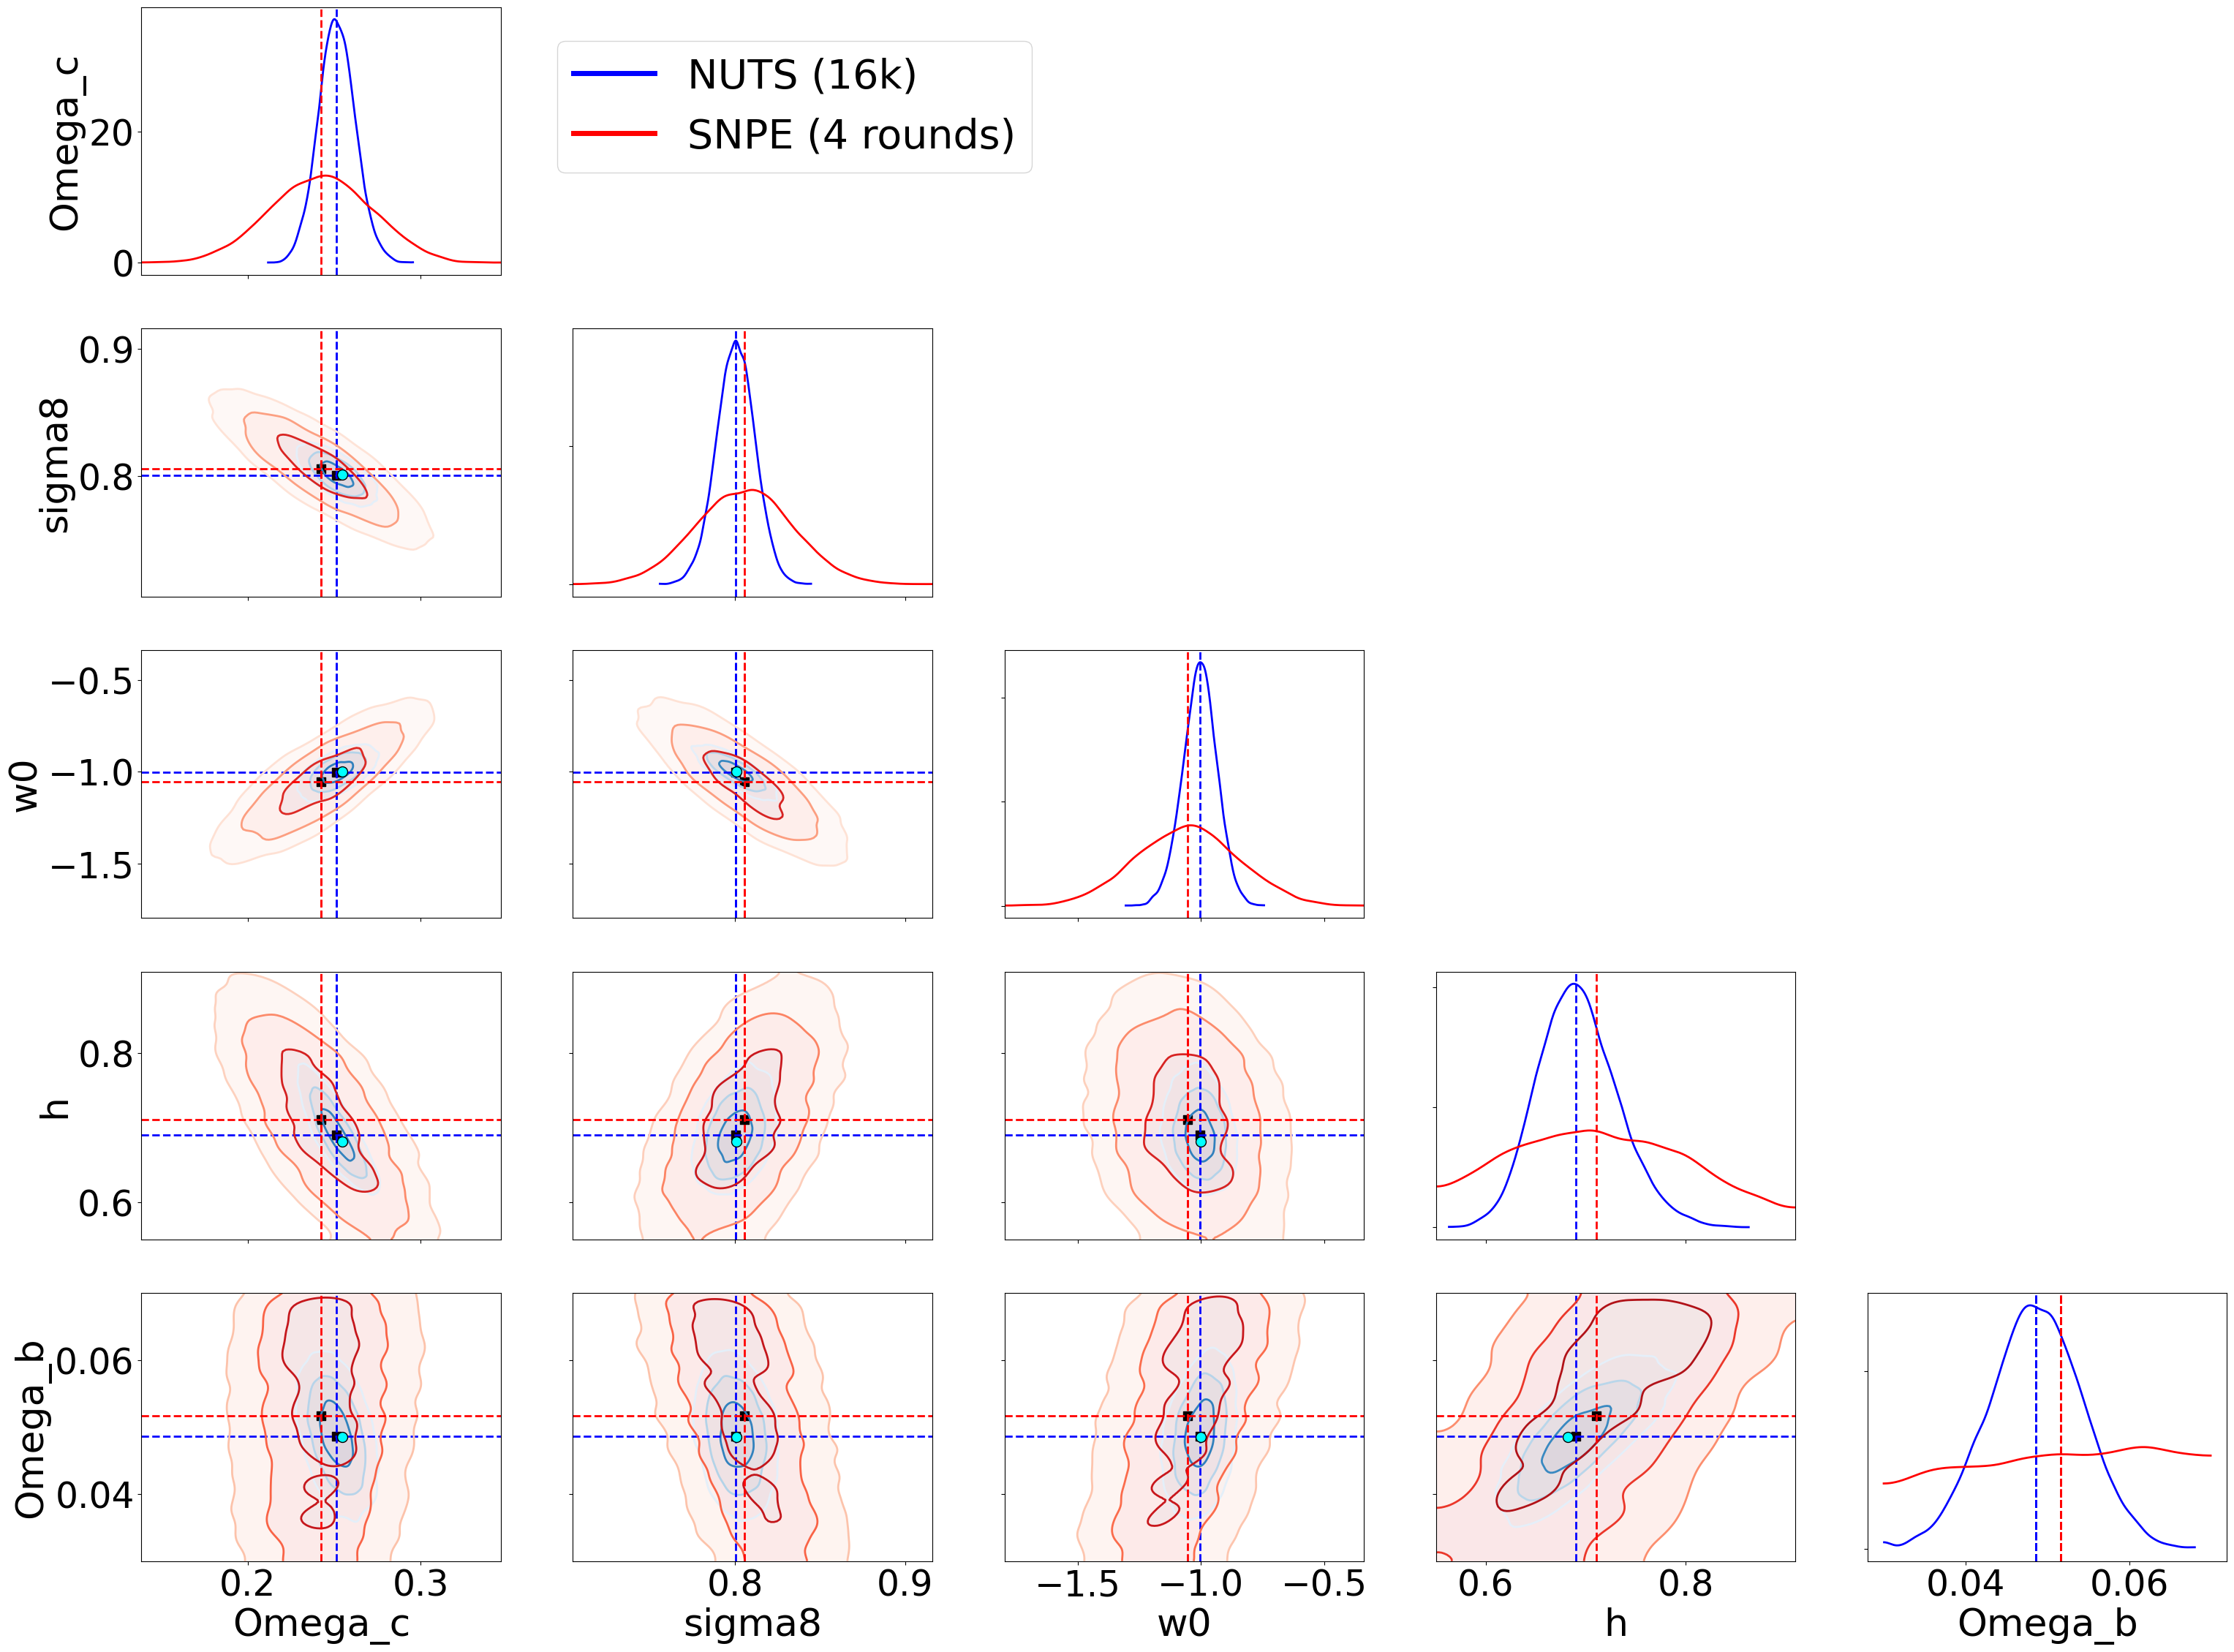

In [27]:
compare(data1=data_nuts_benchmark,data2=data_SNPE_mdn_3,data3=None,
        var_nm=keys, xylims=False,
        label1="NUTS (16k)",label2="SNPE (4 rounds)",label3="SNPE (1round)", 
        reference_values=truth);

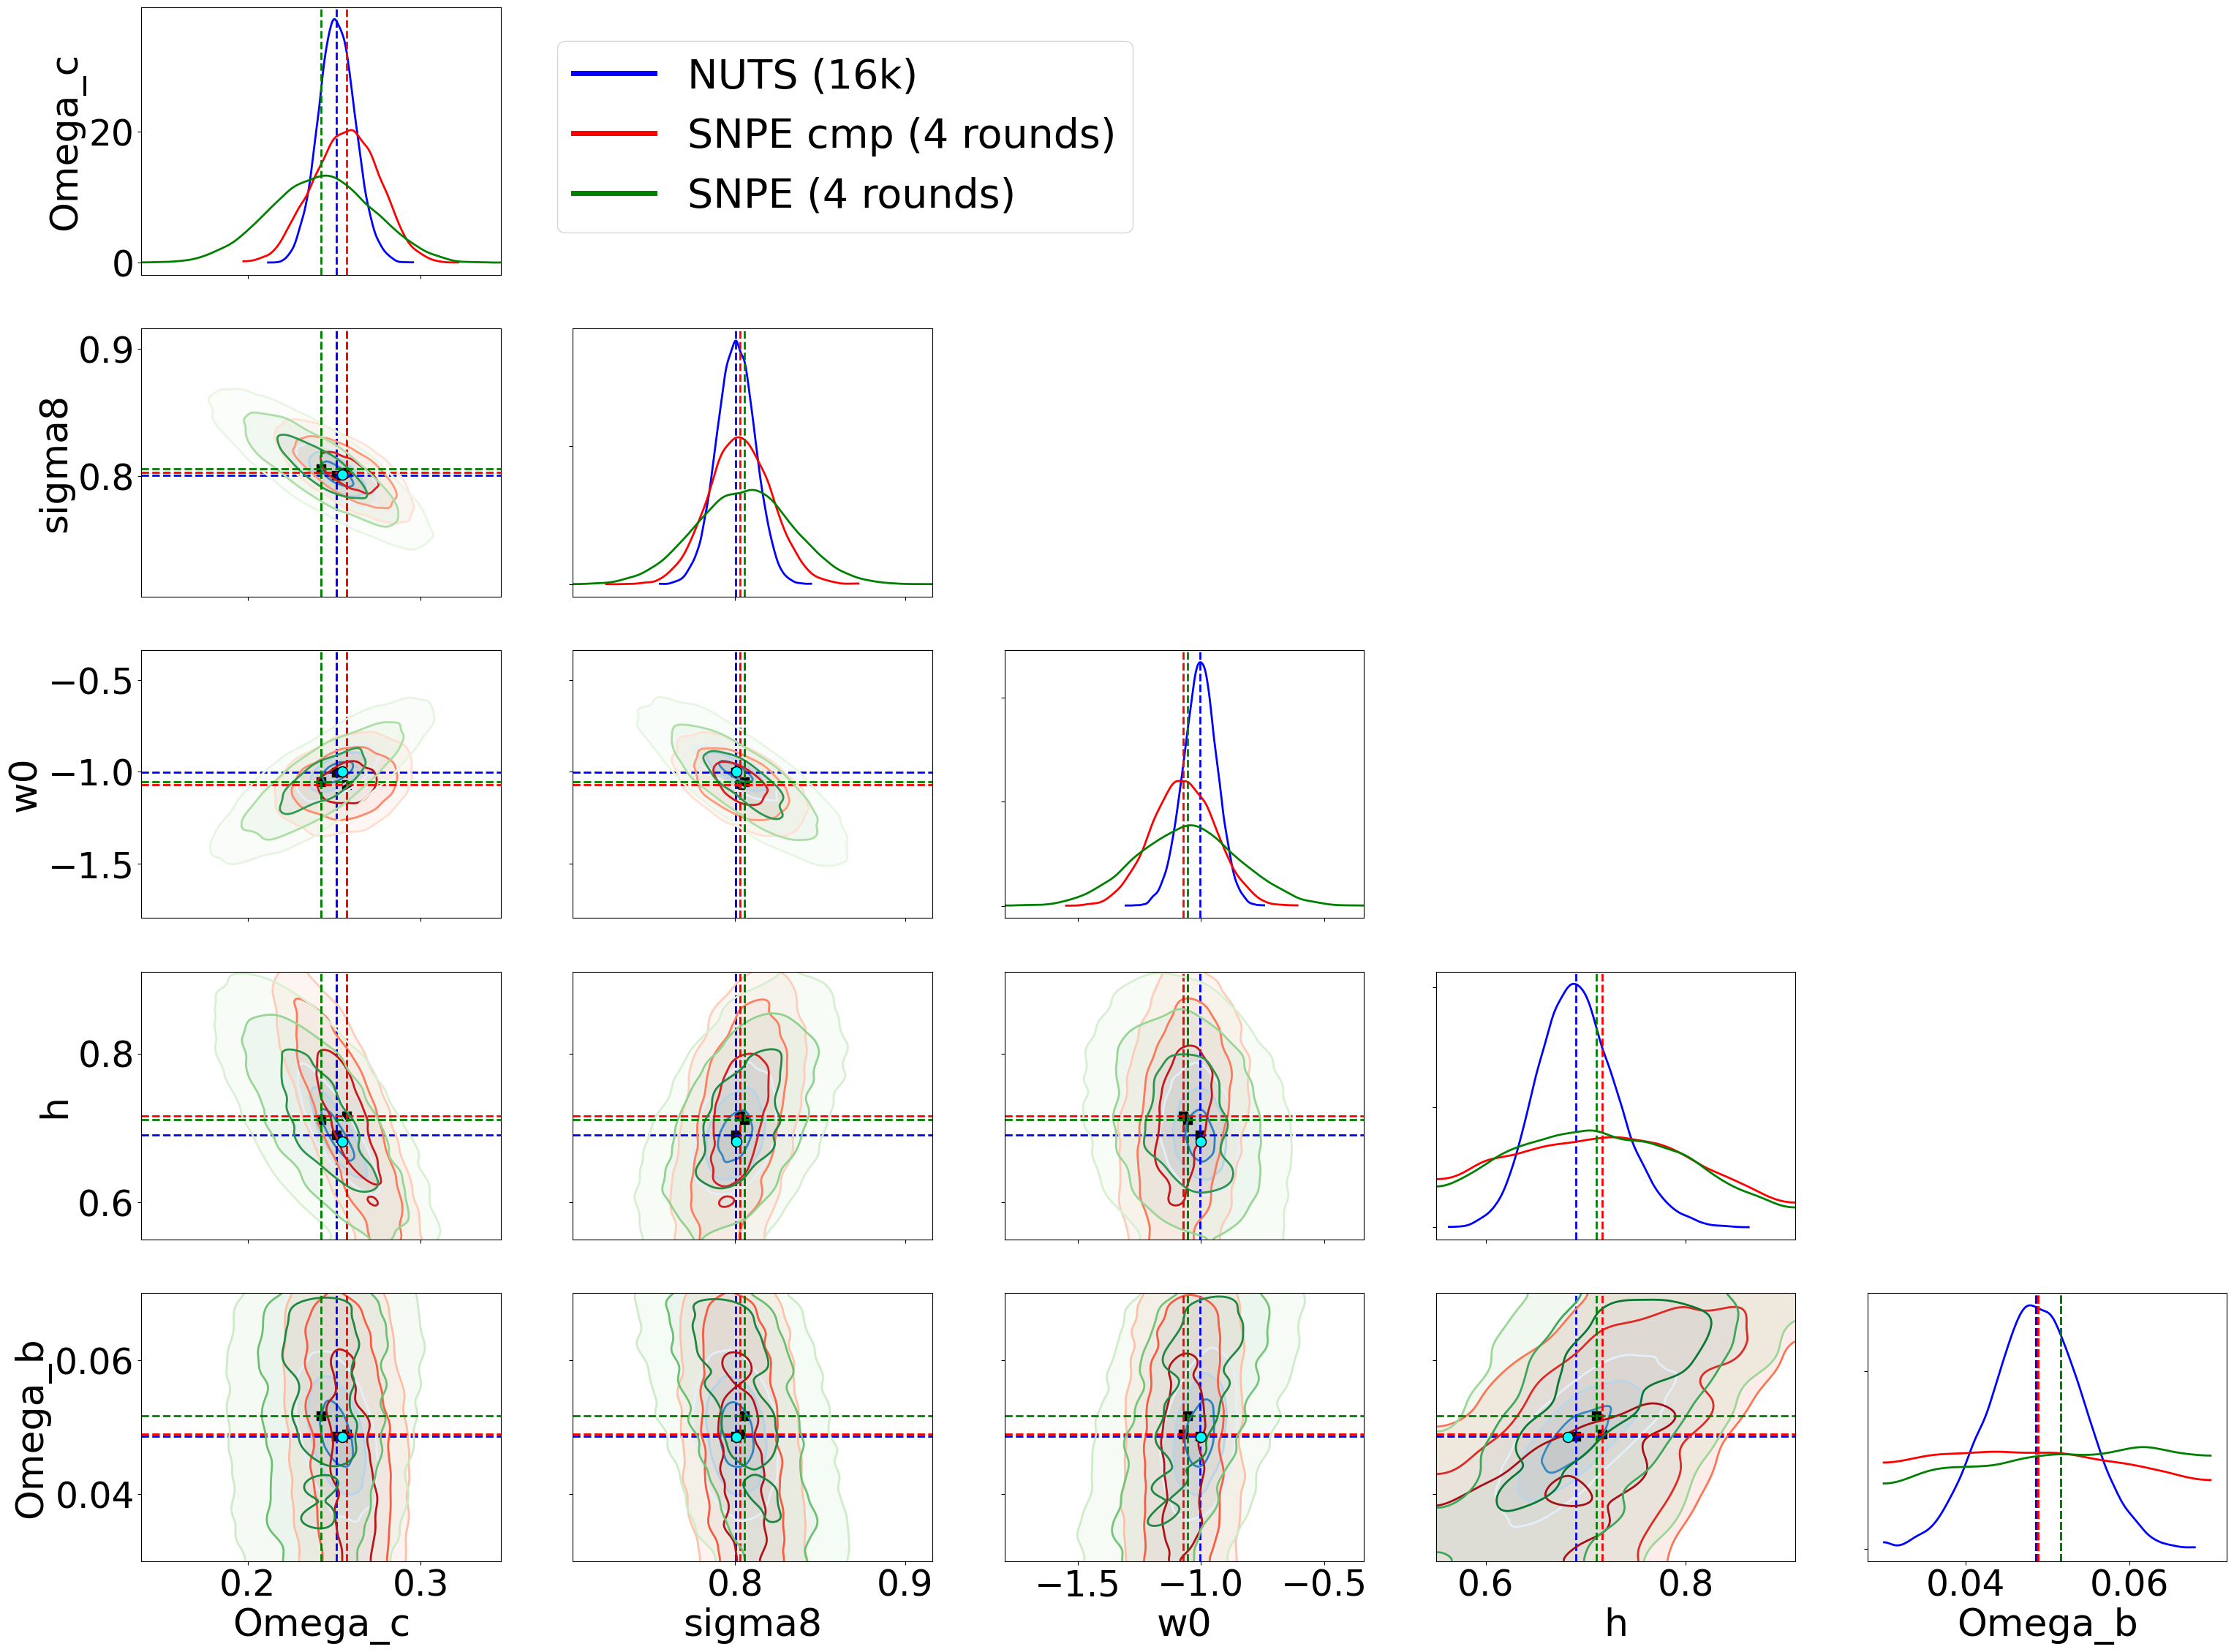

In [34]:
compare(data1=data_nuts_benchmark,data2=data_SNPE_mdn_cpx_3,data3=data_SNPE_mdn_3,
        var_nm=keys, xylims=False,
        label1="NUTS (16k)",label2="SNPE cmp (4 rounds)",label3="SNPE (4 rounds)", 
        reference_values=truth);